In [1]:
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import axes3d
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

# plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Linear Regression
* [$R_2$ Statistic](#R_2-Statistic)
* [Correlation Matrix](#Correlation-Matrix)
* [Advertising Example](#Advertising-Example)
* [Credit Example](#Credit-Example)

# Linear Regression

The linear regression model is expressed as follows
$$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$
where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

In case that $p=2$, $\beta_0$ and $\beta_1$ are known the intercept and slope terms, respectively. 

In practice, we cannot identify $\beta_0,~\beta_1,~\ldots,~\beta_p$. Instead, we can have estimates $\hat{\beta}_0,\hat{\beta}_1, \ldots, \hat{\beta}_p$. Given estimates $\hat{\beta}_0$, $\hat{\beta}_1$, $\ldots$, $\hat{\beta}_p$, the following formula can be used for predictions,
$$\hat{y}=\hat{\beta}_0 +\hat{\beta}_1x_1 +\hat{\beta}_2 x_2 + \ldots +\hat{\beta}_p x_p.$$


Using the least-squares approach, $\beta_0$, $\beta_1$, $\ldots$, $\beta_p$ can be chosen to minimize the sum of squared residuals

\begin{align}
RSS=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-\hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} - \hat{\beta}_3 x_{i3}-\ldots - \hat{\beta}_p x_{ip})^2.
\end{align}

There are a few definitions that we need throughout this document.

## R_2 Statistic
The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. To calculate $R^2$ , we use the formula
$$R^2 =1-\frac{\sum_{i=1}^{n}(y_i −  \hat{y}_i) 2}{\sum_{i=1}^{n}(y_i −  \bar{y}) 2}$$

## Correlation Matrix
 It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set. Defined as correlation
$$Cor(X,Y )=\frac{\sum_{i=1}^{n}(x_i −  \bar{x})(y_i −  \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i −  \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i −  \bar{y})^2}} $$

Correlation Matrix is basically a covariance matrix. Also known as the auto-covariance matrix, dispersion matrix, variance matrix, or variance-covariance matrix.

## Advertising Example
Consider the following example.

In [2]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=list(range(0,4)))
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

 Here, $\beta_j$ is interpreted as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. We have
$$sales = \beta_0 + \beta_1 × TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon. $$

$\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$

In [3]:
Results = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
Results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

As can be seen,
* For a fixed amount of TV and newspaper advertising, spending an additional $1,000 on radio advertising can increase sales by approximately 189 units.

* For a fixed amount of Radio and newspaper advertising, spending an additional $1,000 on TV advertising can increase sales by approximately 46 units.

* However, the coefficient estimate for the newspaper is very close to zero, and the corresponding p-value is insignificant.

RSS:

In [4]:
# RSS with regression coefficients
RSS = ((advertising.Sales - (Results.params[0] + Results.params[1]*advertising.TV
                             + Results.params[1]*advertising.Radio
                             + Results.params[2]*advertising.Newspaper))**2).sum()/1000
print('RSS with regression coefficients = %.4f' % RSS)

RSS with regression coefficients = 4.8304


Correlation Matrix:

In [5]:
advertising.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [6]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    #_ = ax.set_ylim(bottom + 0.5, top - 0.5)

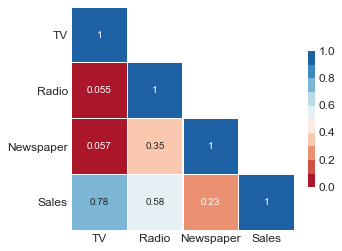

In [7]:
Correlation_Plot (advertising,5)

We can see that the correlation between radio and newspaper is about 0.35. In other words, we can see a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

Since p-value of the newspaper advertising is insignificant, we can provide a 3D diagram with sale, TV, and Radio advertising data.

$$sales = \beta_0 + \beta_1 × TV + \beta_2 \times radio$$

In [8]:
reg = skl_lm.LinearRegression().fit(advertising[['Radio', 'TV']].values,advertising.Sales)
beta0 = reg.intercept_
beta1 = reg.coef_[0]
beta2 = reg.coef_[1]
print("beta0 = %.4f, beta1 = %.4f, and beta2 = %.4f" % (beta0, beta1, beta0))

beta0 = 2.9211, beta1 = 0.1880, and beta2 = 2.9211


In [9]:
# Creating a coordinate grid
Max_Radio=np.ceil(advertising['Radio'].max())
Max_TV=np.ceil(advertising['TV'].max())
Radio = np.arange(0, Max_Radio)
TV = np.arange(0, Max_TV)
# X: Radio
# Y: TV
X, Y = np.meshgrid(Radio, TV, indexing='xy')
# Z: Sales
Z = np.zeros((TV.size, Radio.size))
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(beta0 + X[i,j]*beta1 + Y[i,j]*beta2)

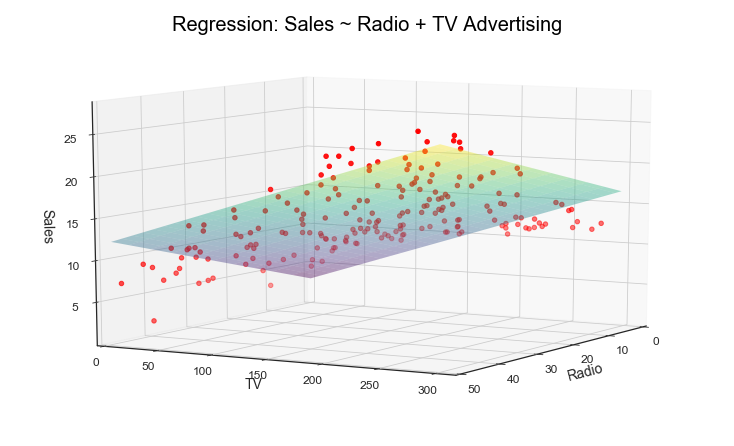

In [10]:
# Create a 3D plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)
ax = axes3d.Axes3D(fig)

_ = ax.plot_surface(X, Y, Z, rstride=10, cstride=5, alpha=0.4, cmap='viridis', edgecolor='none')
_ = ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
_ = ax.set_xlabel('Radio')
_ = ax.set_xlim(0,Max_Radio)
_ = ax.set_ylabel('TV')
_ = ax.set_ylim(bottom=0)
_ = ax.set_zlabel('Sales')
_ = ax.view_init(10, 30)

Note that we do not have to define our linear model in additive way. For example we can define a linear model that uses radio, TV, and an interaction between the two to predict sales takes the
form
\begin{align}
sales &= \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times ( radio \times TV ) + \epsilon\\
&= \beta_0 + (\beta_1 + \beta_3 \times radio ) \times TV + \beta_2 \times radio + \epsilon.
\end{align}

In [11]:
Results = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
Results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

The results clearly suggest that the model that includes the interaction term is superior to the model that contains only the main effects. Since the p-value for the interaction term, TV x radio, is noticeably low, it is clear that the true relationship is **not additive**. 

## Credit Example

In [12]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(0,11)))
credit.head(5)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

The Credit data set contains information about **balance**, **age**, **cards**, **education**, **income**, **limit**, and **rating** for a number of potential customers.

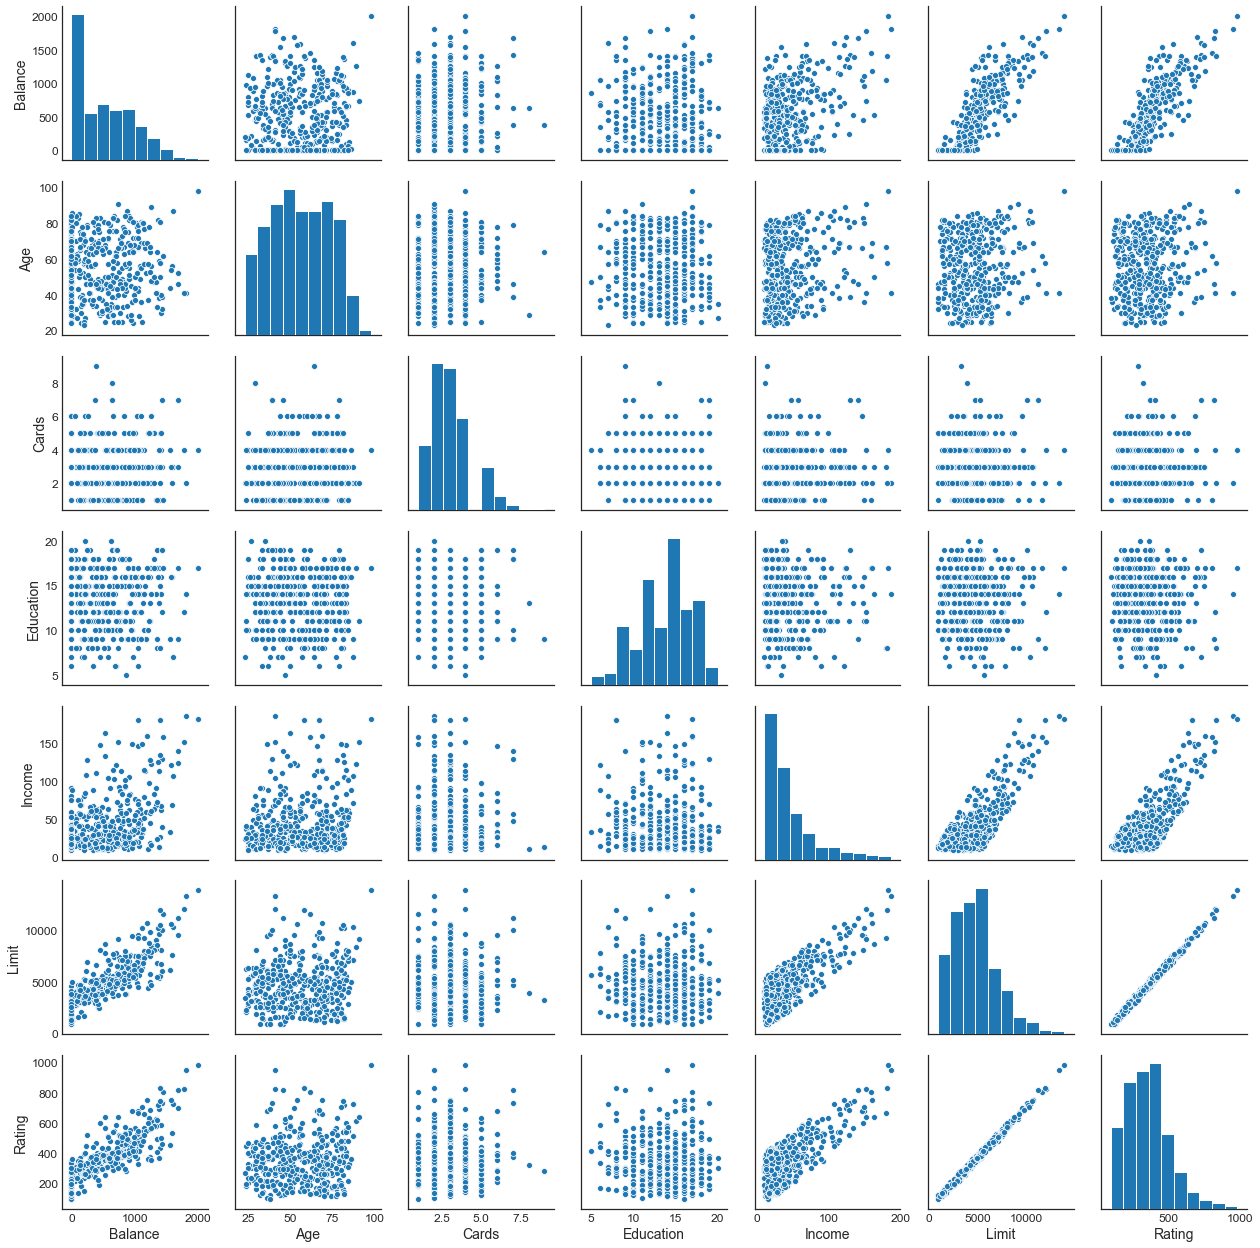

In [13]:
#sns.set(color_codes=True)
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

Each panel of the Figure is a scatterplot for a ***pair of variables*** whose identities are given by the corresponding row and column labels.

For example, the scatterplot directly to the right of the word “Balance” depicts balance versus _age_ , while the plot directly to the right of “Age” corresponds to _age_ versus _cards_ . In addition to these quantitative variables, we also have four qualitative variables: gender , student (student status), status (marital status), and ethnicity (Caucasian, African American or Asian). 

#### Predictors with Only Two Levels

We simply create an indicator or dummy variable that takes on two possible dummy variable numerical values (binary values).

For example, based on the gender variable, we can create a new binary variable that takes the form
$$x_i =\begin{cases}1, & \mbox{if ith person is female}, \\0, & \mbox{if ith person is male},\end{cases}$$

and the regression equation:

$$y_i = \beta_0 + \beta_1 x i + \epsilon_i =\begin{cases}\beta_0 + \beta_1 + \epsilon_i, & \mbox{if ith person is female}, \\\beta_0 + \epsilon_i , & \mbox{if ith person is male.}\end{cases}$$

In [14]:
Results = smf.ols('Balance ~ C(Gender)', credit).fit()
Results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

$$y_{i} = \beta_0 +\beta_1 x_{i1} +\beta_2 x_{i2} +\epsilon_i =
\begin{cases}
\beta_0 +\beta_1 +\epsilon_i , & \mbox{if ith person is Asian},\\
\beta_0 +\beta_2 +\epsilon_i, & \mbox{ if ith person is Caucasian},\\
\beta_0 +\epsilon_i , & \mbox{if ith person is African American}.
\end{cases}$$ 

In [15]:
Results = smf.ols('Balance ~ C(Ethnicity)', credit).fit()
Results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

$$y_i = \beta_0 + \beta_1 x i + \epsilon_i =\begin{cases}\beta_0 + \beta_1 + \epsilon_i, & \mbox{if ith person is Married}, \\\beta_0 + \epsilon_i , & \mbox{if ith person is not Married.}\end{cases}$$

In [16]:
Results = smf.ols('Balance ~ C(Married)', credit).fit()
Results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

There is an interaction term between income and student. We have

\begin{align}
\text{balance}_i \approx \beta_0 + \beta_1 \times \text{income}_i +
\begin{cases}
\beta_2, & \mbox{if ith person is a student},\\0, & \mbox{if ith person is not a student} \\
\end{cases}
=\beta_1 \times \text{income}_i +
\begin{cases}
\beta_0 + \beta_2, & \mbox{if ith person is a student},\\ \beta_0, & \mbox{if ith person is not a student} \\
\end{cases}
\end{align} 

\begin{align}
\text{balance}_i &\approx \beta_0 + \beta_1 \times \text{income}_i +
\begin{cases}
\beta_2+\beta_3 \times \text{income}_i, & \mbox{if ith person is a student},\\0, & \mbox{if ith person is not a student} \\
\end{cases}\\
&=\begin{cases}
(\beta_0+\beta_2)+(\beta_1+\beta_3) \times \text{income}_i, & \mbox{if ith person is a student},\\ \beta_0 + \beta_1 \times \text{income}_i, & \mbox{if ith person is not a student} \\
\end{cases}
\end{align} 

**Regression 1 - without interaction term:**

In [17]:
Results1 = smf.ols('Balance ~ Income + Student', credit).fit()
reg1 = Results1.params
Results1.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

**Regression 2 - with interaction term:**

In [18]:
Results2 = smf.ols('Balance ~ Income + Income*Student', credit).fit()
reg2 = Results2.params
Results2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [19]:
# For plotting only
Max_Income=np.ceil(credit['Income'].max())
Max_Balance=np.ceil(credit['Balance'].max())

In [20]:
# x-axis (Income)
income = np.linspace(0,Max_Income)

# y-axis (Balance without interaction term)
st1 = np.linspace(reg1['Intercept']+reg1['Student[T.Yes]'],
                         reg1['Intercept']+reg1['Student[T.Yes]']+Max_Income*reg1['Income'])
non_st1 =  np.linspace(reg1['Intercept'], reg1['Intercept']+Max_Income*reg1['Income'])

# y-axis (Balance with iteraction term)
st2 = np.linspace(reg2['Intercept']+reg2['Student[T.Yes]'],
                         reg2['Intercept']+reg2['Student[T.Yes]']+Max_Income*(reg2['Income']+reg2['Income:Student[T.Yes]']))
non_st2 =  np.linspace(reg2['Intercept'], reg2['Intercept']+Max_Income*reg2['Income'])

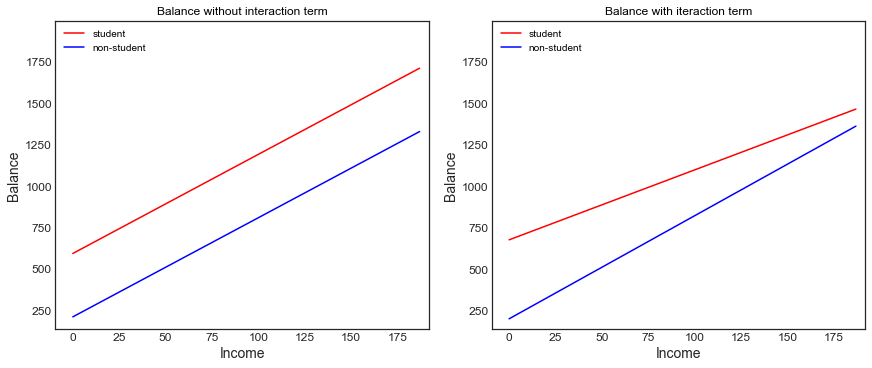

In [21]:
#sns.set(color_codes=True)
# Create plot
fig, ax = plt.subplots(1, 2, constrained_layout=True,figsize=(12,5))
# Balance without interaction term
_ = ax[0].set_title('Balance without interaction term')
_ = ax[0].plot(income, st1, 'r', income, non_st1, 'b')
_ = ax[0].legend(['student', 'non-student'], loc=2)
_ = ax[0].set_xlabel('Income')
_ = ax[0].set_xlim(right=Max_Income+5)
_ = ax[0].set_ylabel('Balance')
_ = ax[0].set_ylim(top=Max_Balance)
# Balance with iteraction term
_ = ax[1].set_title('Balance with iteraction term')
_ = ax[1].plot(income, st2, 'r', income, non_st2, 'b')
_ = ax[1].legend(['student', 'non-student'], loc=2)
_ = ax[1].set_xlabel('Income')
_ = ax[1].set_xlim(right=Max_Income+5)
_ = ax[1].set_ylabel('Balance')
_ = ax[1].set_ylim(top=Max_Balance)